<a href="https://colab.research.google.com/github/GinaShome/PlottingTemplate/blob/main/Plotting_Template_E5DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Setup

In [ ]:
#note that each time you run it, you have to run this first. Itll spit that plt or sns are undefined otherwise, or that columns arent defined
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#You can ignore this section, this is just how I connected the files (through github) to this notebook so the data can be used.
HydrophilicUrl = 'https://raw.githubusercontent.com/GinaShome/E53/main/Experiments%205%20Data%20Format%202%20-%20Hydrophillic%20(23).csv'
HydrophilicSDUrl = 'https://raw.githubusercontent.com/GinaShome/E53/main/Standard%20Data%20-%20Hydrophilic%20Plot%20Format%20(3).csv'
HydrophilicIsoUrl = 'https://raw.githubusercontent.com/GinaShome/E53/main/Standard%20Data%20-%20Hydrophilic%20for%20scatter%20(4).csv'

HydrophobicUrl = 'https://raw.githubusercontent.com/GinaShome/E53/main/Experiments%205%20Data%20Format%202%20-%20Hydrophobic%20(7).csv'
HydrophobicSDUrl = 'https://raw.githubusercontent.com/GinaShome/E53/main/Standard%20Data%20-%20Hydrophobic%20Plot%20Format%20(5).csv'
HydrophobicIsoUrl = 'https://raw.githubusercontent.com/GinaShome/E53/main/Standard%20Data%20-%20Hydrophobic%20for%20scatter%20(3).csv'

#These are the two data sets youll likely need. df is hydrophilic, hf is hydrophobic.
df = pd.read_csv(HydrophilicUrl)
hf = pd.read_csv(HydrophobicUrl)


#Sarah you can ignore these data sets. They were made specifically for some complicated errorbar plots at the bottom
dfSD = pd.read_csv(HydrophilicSDUrl)
hfSD = pd.read_csv(HydrophobicSDUrl)
hfISO = pd.read_csv(HydrophobicIsoUrl)
dfISO = pd.read_csv(HydrophilicIsoUrl)

In [ ]:
#declare column names
height_level_column = 'Height [level]'
fur_density_column = 'Fur Density [furs/cm^2]'
orientation_column = 'Fur Orientation'
arrangement_column = 'Fur Arrangement'
num_drops_column = 'Number of Drops'
steady_state_penetration_column = 'Steady State Penetration Depth [mm]'
steady_state_domeheight_column = 'Steady State Dome Height [mm]'
max_penetration_column = 'Maximum Penetration Depth [mm]'
final_spread_column = 'Droplet Final Spread [mm]'
max_spread_column = 'Droplet Maximum Spread [mm]'
velocity_column = 'Droplet Velocity [m/s]'
min_dome_height_column = 'Minimum Dome Height [mm]'
video_index_max_spread_column = 'Video Index of Max. Spread'
delta_pos_column = 'Delta_pos'
delta_spread_column = 'Delta_spread'
delta_pen_column = 'Delta_Pen'
weber_number_column = 'Weber #'
modified_AR_column = 'Modified Aspect Ratio'
initial_IC_column = 'Initial Impact Classification'
final_IC_column = 'Final Impact Classification'
impact_shape_column = 'Initial Impact Shape'
impact_dome_column = 'Initial Impact Dome'
initial_spread_column = 'Initial Spread'
rebound_column = 'Rebound Type'
final_dome_column = 'Final Impact Dome'
final_shape_column = 'Final Impact Shape'
fragmentation_column = 'Fragmentation'
product_column = 'Product'
final_spread_column = 'Droplet Final Spread [mm]'
final_penetration_column = 'Droplet Final Penetration [mm]'
normalized_max_pen_column = 'Normalized Maximum Penetration Depth [mm]'

WEAVG = 'We Avg'
WESTD = 'We STD'
NPDAVG = 'nPD Avg'
NPDSTD = 'nPD STD'
DENSITY = 'Density'
DELTAAVG = 'Delta Avg'
DELTASTD = 'Delta STD'
DELTASPREADAVG ='Delta Spread Avg'
DELTASPREADSTD = 'Delta Spread STD'

We = 'We'
nPD = 'nPD'
nDeltaPen = 'Normalized Delta Pen'
nDeltaSpread = 'Normalized Delta Spread'

# Data Analysis


<ipython-input-3-70b07fecf5cf>:21: UserWarning: The markers list has more values (10) than needed (2), which may not be intended.
  g = sns.scatterplot(x=weber_number_column, y=modified_AR_column, data=df[(df[arrangement_column] == 'staggered')],


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

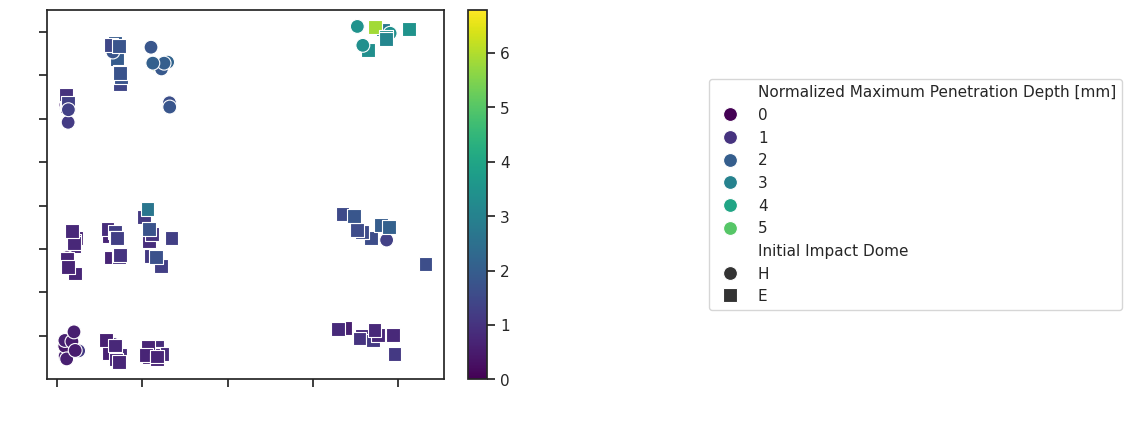

In [ ]:
###gets rid of all of the bad data/non-numeric entries just in case.
X = df.drop([delta_pen_column], axis=1)
X_encoded = pd.get_dummies(X)

sns.set(style="white")

#------------------------------COLORBAR EXPLANATION
#setting up the "Scalar mappable" to turn our data into a uniformely scaled/continuous hexcode gradient
#btw when changing between hydrophilic and hydrophobic, DOOOONT change the vmax=hf[] part of this.
#By keeping it as hf for both, it keeps the color-scheme+ scaling standard, which is what we need for figures
norm = plt.cm.colors.Normalize(vmin=0, vmax=hf[normalized_max_pen_column].max())
scalar_mappable = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
scalar_mappable.set_array([])

#Alright! Time to plot. Seaborn has a TOOOOON of plot types. The syntax is all very similar.
#We'll start with a scatterplot. For more detailed parameter explanations go here https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#By doing g=, i can now specifically curate a colorbar+axes to this specific plot (called g)
g = sns.scatterplot(x=weber_number_column, y=modified_AR_column, #choose two columns w/ numeric data from the list you made.
                  data=df[(df[arrangement_column] == 'staggered')], #In case I ONLY want to plot points whose "arrangement_column" is "staggered". Delete this column if you dont need to further specify. You can also have multiple specifications to even further restrict which rows get plotted.
                  hue=df[normalized_max_pen_column], #make this the same as the column you chose for the scalar mappable above. DO change this dataset as needed, DONT change the one from the scalar mappable line if you have multiple.
                  hue_norm = norm,
                  style = impact_dome_column, #the column you want to determine shapes of your plot-points. Ideally, this is non-numeric.
                  markers=["o", "s", "D", "X", "H", "P", "*", "<", ">", "v"], #there are more options for shapes, these are just some. it will assign them in the order of that list  FROM the order it reads straight down your column. If you have multiple plots side-by-side in a figure, you may have to manually switch the order of these so its consistent.
                  palette='viridis', s=100, edgecolor='w')

fig = plt.gcf()

#this colorbar uses the custom "scalar mappable" we created earlier, and sets the axis (data) to the g plot.
g.figure.colorbar(scalar_mappable, ax=g)

g.legend(loc='center left', bbox_to_anchor=(1.65, 0.5), ncol=1)

plt.xlabel(' ')
plt.ylabel(' ')
#plt.title('Hydrophilic, aligned')

#--------------------------------TICKS EXPLANATION
#since our "g" plot has x and y axis properties, we can change the tick info. This is just a method defined in the seaborn catalog.
#We dont have to manually use facetgrid for this. Even though its the same thing, the scatterplot class already implements the facetgrid class
g.xaxis.set_tick_params(which='both', direction='out', top=False, bottom=True)
g.yaxis.set_tick_params(which='both', direction='out', left=True, right=False)
g.set_xticklabels([])
g.set_yticklabels([])

image_format = 'svg'
image_name = 'maxpd.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
#files.download(image_name)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

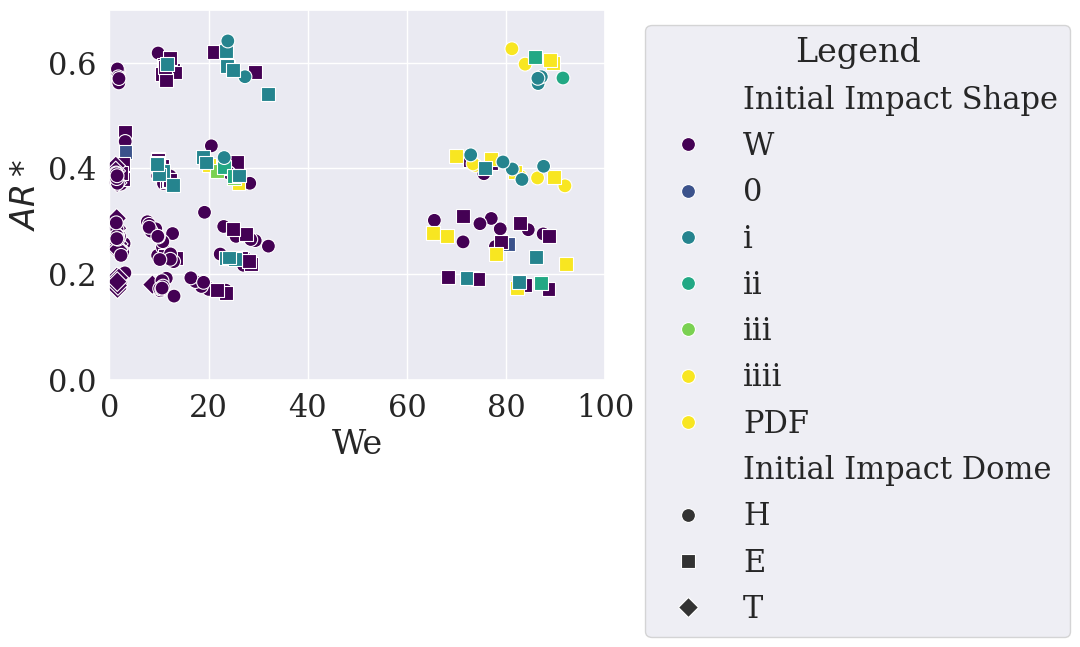

In [ ]:
# Aspect Ratio vs Weber Number FIRST VS SECOND DRP
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
sns.set(style="white")

#PARAMETERS, WILL CHANGE THE PLOT OUTCOME

#To change x and y axis, replace x and y
#To change the data set from hydrophilic to hydrophobic, change data=df to data=hf
#HUE determines the column that it bases color on.
#STYLE determines the column to assign shapes.
#MARKERS represent the actual shapes that the figure will have. o is a circle, s is a square, and D is a diamond.
#For a visual explanation, theres a figure explaining this in the paper, but o means Half-Embedded (H), s means Embedded (E), and D means Top (T). It is case-sensitive btw!

#IMPORTANT!!! the one thing that may be a bit confusing here:
#I havent had the time to fix this yet, but it assigns markers based on what it sees first as it reads through the column.
#As you change the data set from hf to df, the order will change, and youll have to flip the first two markers in the list so that its consistent between hydrophilic and hydrophobic for the figure.
#That's because the hydrophilic and hydrophobic data are in two separate sheets, and naturally, the trials did not produce the same results, but the code doesn't know that.
#Otherwise the figure will be misleading. If youre having any trouble with this, or if I explained this poorly, please feel free to text me or we can call sometime and I can explain it better

#To change the color pallette: (probably not for this figure but if youre doing a different one)
#"viridis" is one of the default sns color palletes that they already coded. Its a continuous array from 0 to 0.99, where 0 is purple and 0.99 is yellow.
#I wanted to manually set the colors for this figure,
#so i put under pallette=cm.viridis (that part means its from the cm/colormap import, and the pallete I chose was viridis) and a number to correspond to color (ranges from yellow to purple)
#There just has to be the same amount of colors in "pallette=" as there are in "hue_order=", otherwise itll reuse the first ones and look really confusing.
#Another note, in the paper, we merged the iiii and PDF shapes to "4+",
#but in the spreadsheet its still like that. So I made iiii and PDF correspond to the same color (cm.viridis(0.99) aka yellow)
#Anyway, in the final powerpoint figure, make sure to use the updated legend I already made or just delete the duplicate labels (not in the code, just in powerpoint) and replace it with "4+" instead.
#again sorry if thats confusing feel free to text/call me for questions


#TLDR:
#-flip between hydrophilic and hydrophobic:
#                                  switch "data=" from df to hf
#                                  **make sure that the legend matches the data. You will have to change the markers array. If I remember correctly, for most of these plots, (check me on this!!!) for df it should be  markers=["s","o","D"]
#-flip between first drop and second drop:
#                                  First drop: hue= impact_shape_column            style=impact_dome_column
#                                  Second drop: hue= final_shape_column            style=final_dome_column


#CHANGE FONT SCALE
sns.set(font_scale=2)
#CHANGE THE FONT
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

#More detailed parameter explanations: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#I also explained up above
sns.scatterplot(x=weber_number_column, y=modified_AR_column,
                data=hf,
                hue=impact_shape_column,
                style = impact_dome_column, markers=["o", "s", "D"], #Full list of markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
                hue_order = ["W","0", "i", "ii", "iii", "iiii", "PDF"], #IF you need to assign specific colors to specific entries in your column
                palette = [cm.viridis(0),cm.viridis(0.25),cm.viridis(0.45),cm.viridis(0.60), cm.viridis(0.80), cm.viridis(0.99), cm.viridis(0.99)],
                s=100, edgecolor='w')
#SETS AXIS LIMITS
plt.xlim(0, 100)
plt.ylim(0, 0.7)

#SETS LABELS
plt.xlabel('We') #You cant really get Latex code on here to look good for the figure labels. Id reccomend deleting these in powerpoint and replacing them with the ones from another figure.
plt.ylabel('$AR*$')
#plt.title('$AR*$ vs $We$, HYDROPHOBIC, second drop') #YOU CAN PUT A TITLE USING THIS BUT ITS EASIER TO DO/FORMAT IN POWERPOINT INSTEAD
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')


#This is the code that saves the plot. Everytime you run it, it will download a new file.
#That gets annoying after awhile if youre just trying to experiment with it, so if you want it to not download, just put a hashtag before the files.download(image_name) line
image_format = 'svg' # Only use SVG format here, a regular image will get blurry if you increase the size in powerpoint
image_name = 'arwe1vs2.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
files.download(image_name) #comment out this line to stop it from downloading
plt.show()

In [ ]:
#PEN DEPTH COLORBAR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt


X = df.drop([delta_pen_column], axis=1)
X_encoded = pd.get_dummies(X)

sns.set(style="white")

#colors time
#cmap = cm.viridis
norm = plt.cm.colors.Normalize(vmin=0, vmax=hf[max_penetration_column].max())
scalar_mappable = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
scalar_mappable.set_array([])

g = sns.scatterplot(x=weber_number_column, y=modified_AR_column, data=df[(df[arrangement_column] == 'parallel')],
                  hue=df[max_penetration_column],
                  hue_norm = norm,
                  style = impact_dome_column, markers=["o", "s", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette='viridis', s=100, edgecolor='w')

fig = plt.gcf()

#g.get_legend().remove()
g.figure.colorbar(scalar_mappable)

#g.cbar = fig.colorbar(scalar_mappable, ax = g)
#g.cbar.set_label('Delta_Pen')
g.legend(loc='center left', bbox_to_anchor=(1.65, 0.5), ncol=1)

plt.xlabel('We')
plt.ylabel('AR*')
plt.title('Hydrophilic, aligned')

image_format = 'svg'
image_name = 'maxpd.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
files.download(image_name)

plt.show()

<ipython-input-21-907c22864aae>:6: UserWarning: The markers list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=final_spread_column, y=steady_state_penetration_column,


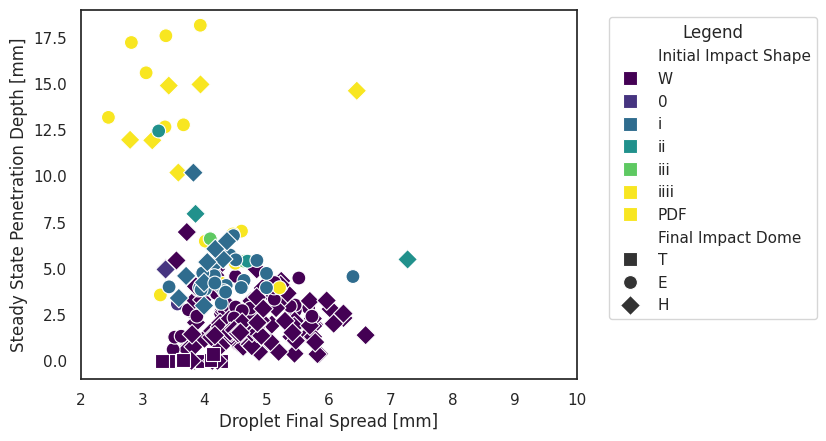

In [ ]:
# max spread vs max pen depth
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
sns.set(style="white")

sns.scatterplot(x=final_spread_column, y=steady_state_penetration_column,
                data=hf,
                hue= impact_shape_column,
                style = final_dome_column, markers=["s", "o", "D", "X", "H", "P", "*", "<", ">", "v"],
                palette = [cm.viridis(0) ,cm.viridis(0.15),cm.viridis(0.35), cm.viridis(0.5),cm.viridis(0.75), cm.viridis(0.99),cm.viridis(0.99)],
                hue_order = ["W", "0", "i", "ii", "iii", "iiii", "PDF"],
                s=100, edgecolor='w')
plt.xlim(2,10)
plt.ylim(-1, 19)

#plt.xlabel('Maximum Spread')
#plt.ylabel('Maximum Penetration')
#plt.title('Max Penetration vs Max Spread')
#plt.colorbar()
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'arwe1vs2.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
#files.download(image_name)
plt.show()

<ipython-input-31-c4720c7befde>:2: UserWarning: The markers list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x='Taush', y=delta_spread_column, data=df,


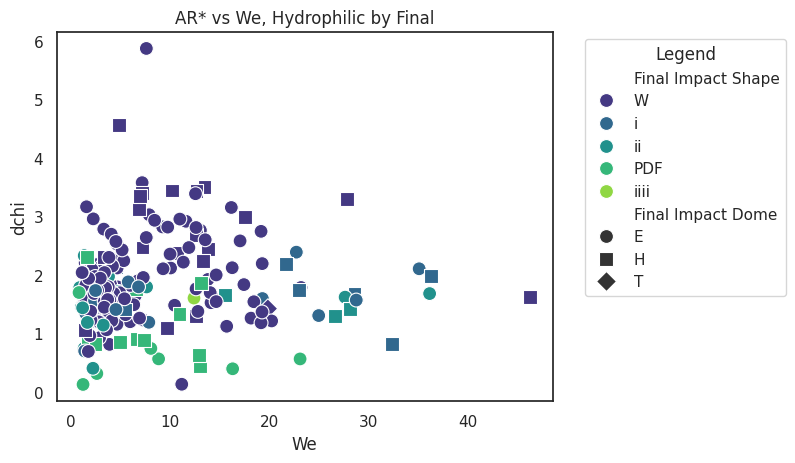

In [ ]:
#FINAL IMPACT
sns.scatterplot(x='Taush', y=delta_spread_column, data=df,
                  hue=final_shape_column,
                  style = final_dome_column, markers=["o", "s", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette='viridis', s=100, edgecolor='w')
plt.xlabel('We')
plt.ylabel('dchi')
plt.title('AR* vs We, Hydrophilic by Final')
#plt.colorbar()
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'myimage.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
#files.download(image_name)
plt.show()

In [ ]:
# Drop Veocity vs Delta Spread
import matplotlib.cm as cm
sns.set(style="white")


sns.scatterplot(x=velocity_column, y=delta_spread_column, data=hf,
                  hue=orientation_column,
                  style = impact_dome_column, markers=["s", "o", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette = [cm.viridis(0.33),cm.viridis(0.66), cm.viridis(0.99)], hue_order = ['standard', 'bottom facing up', 'front facing up'], s=100, edgecolor='w')

plt.xlabel('Drop Velocity [m/s]')
plt.ylabel('$\Delta \chi$')
#plt.title('Delta Spread vs Drop Velocity (All Hydrophilic)')
#plt.colorbar()
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'delspdelvel.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
#files.download(image_name)


plt.show()

NameError: name 'sns' is not defined

<ipython-input-17-68a989b1e651>:7: UserWarning: The markers list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=weber_number_column, y=delta_spread_column, data=df,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

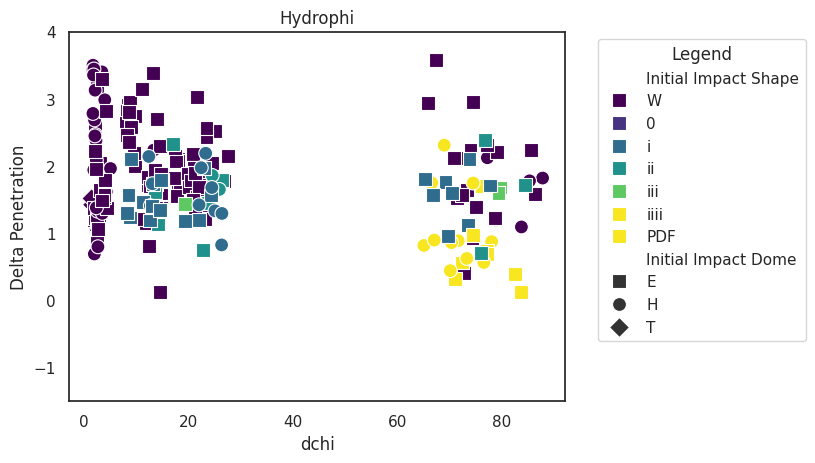

In [ ]:
# Weber Number vs Delta Penetration

import matplotlib.cm as cm
sns.set(style="white")


sns.scatterplot(x=weber_number_column, y=delta_spread_column, data=df,
                  hue=impact_shape_column,
                  style = impact_dome_column, markers=["s", "o", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette = [cm.viridis(0) ,cm.viridis(0.15),cm.viridis(0.35), cm.viridis(0.5),cm.viridis(0.75), cm.viridis(0.99),cm.viridis(0.99)],
                  hue_order = ["W", "0", "i", "ii", "iii", "iiii", "PDF"],
                  s=100, edgecolor='w')
#plt.xlim(-0.1, 2)
plt.ylim(-1.5, 4)
plt.xlabel('dchi')
plt.ylabel('Delta Penetration')
plt.title('Hydrophi')
#plt.colorbar()
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'delpenvswe.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
files.download(image_name)


plt.show()

<ipython-input-22-5425d7d76fba>:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x='Fragmentation', y=delta_spread_column, data=hf,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

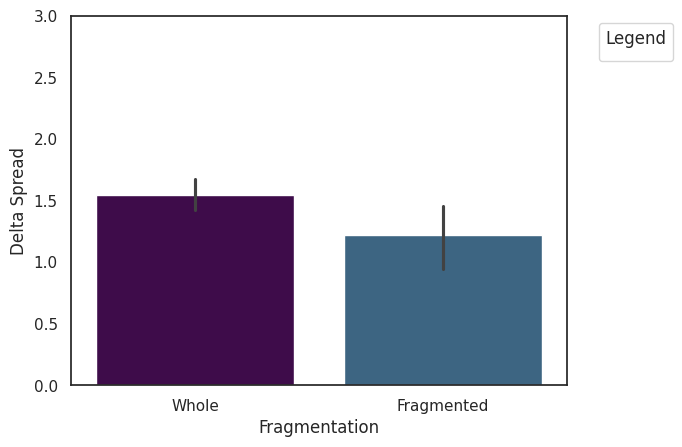

In [ ]:
# Weber Number vs Delta Penetration

import matplotlib.cm as cm
sns.set(style="white")


#plt.xlim(0, 100)
sns.barplot(x='Fragmentation', y=delta_spread_column, data=hf,
                  hue='Fragmentation',
                  hue_order = ["Whole", "Fragmented"],
                  palette = [cm.viridis(0) ,cm.viridis(0.33),cm.viridis(0.66),cm.viridis(0.99)])
plt.ylim(0, 3)
#plt.xlabel('')
plt.ylabel('Delta Spread')
#plt.title('Hydrophobic')
#plt.colorbar()
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'delpenvswe.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
files.download(image_name)


plt.show()

<ipython-input-15-fd526f8ceab0>:5: UserWarning: The markers list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=delta_pen_column, y=delta_spread_column, data=df,


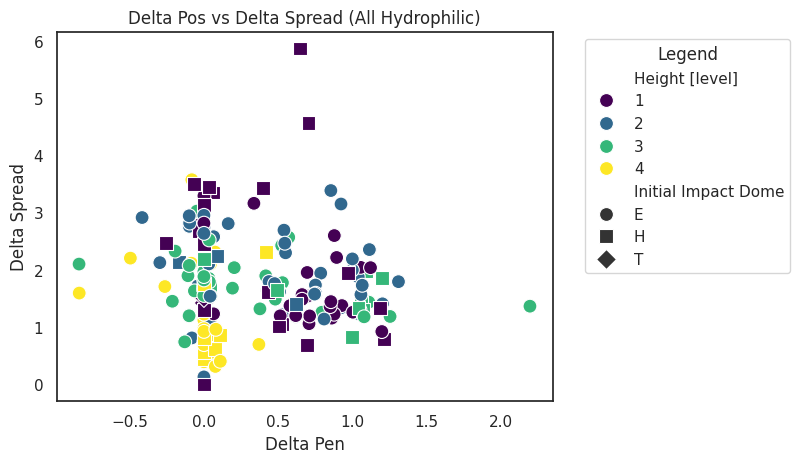

In [ ]:
# Delta Pen vs Delta Spread
sns.set(style="white")


sns.scatterplot(x=delta_pen_column, y=delta_spread_column, data=df,
                  hue=height_level_column,
                  style = impact_dome_column, markers=["o", "s", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette='viridis', s=100, edgecolor='w')

plt.xlabel('Delta Pen')
plt.ylabel('Delta Spread')
plt.title('Delta Pos vs Delta Spread (All Hydrophilic)')
#plt.colorbar()
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'myimage.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
#files.download(image_name)


plt.show()

<ipython-input-37-71a38e4ae5a3>:5: UserWarning: The markers list has more values (10) than needed (3), which may not be intended.
  g = sns.scatterplot(x=delta_pos_column, y=delta_spread_column, data=hf,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

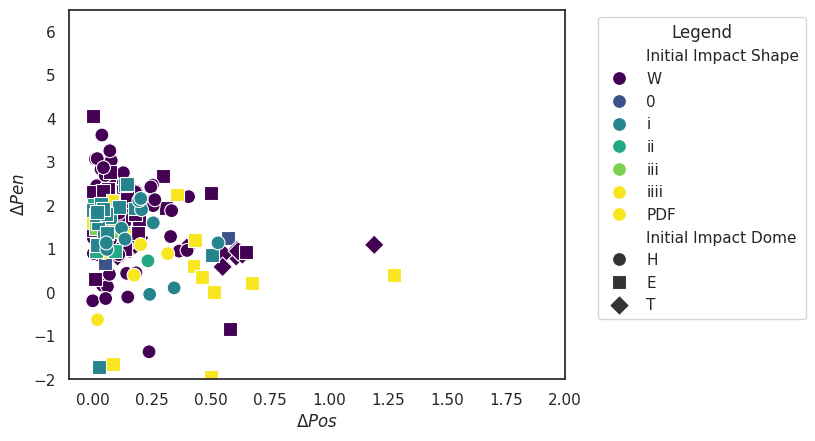

In [ ]:
# Delta Pos vs Delta Spread
sns.set(style="white")


g = sns.scatterplot(x=delta_pos_column, y=delta_spread_column, data=hf,
                  hue=impact_shape_column, hue_order = ["W", "0", "i", "ii", "iii", "iiii", "PDF"],
                  style = impact_dome_column, markers=["o", "s", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette = [cm.viridis(0),cm.viridis(0.25),cm.viridis(0.45),cm.viridis(0.60), cm.viridis(0.80), cm.viridis(0.99), cm.viridis(0.99)], s=100, edgecolor='w')

plt.xlabel('$\Delta Pos$')
plt.ylabel('$\Delta Pen$')

#plt.title('Hydrophobic')
plt.ylim(-2, 6.5)
plt.xlim(-0.1, 2)
#plt.colorbar()
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
ylim = [-2.5,6]
#g.get_legend().remove()
#plt.tight_layout(rect=[0,0,0.95,1])
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'poschi.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
files.download(image_name)


plt.show()

In [ ]:
#PEN DEPTH COLORBAR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt

selected_columns = [
    weber_number_column, modified_AR_column, initial_IC_column, final_IC_column, arrangement_column, orientation_column,'Delta_Pen']
df_selected = df[selected_columns].dropna()  # Drop rows with missing values

X = df_selected.drop(['Delta_Pen'], axis=1)
X_encoded = pd.get_dummies(X)

#markers library
markers = ['o', 's', '*', '^', 'v', 's', '*', '^', '<', '>', 'v']

marker_map = {
    "E, W": "o",
    "EW": "o",
    "E, D": "o",
    "E, i": "s",
    "E, ii": "*",
    "E, iii": "*",
    "E, PDF": "^",
    "T, W": "v",
    "D, W": "<",
    "D, PDF": ">",
    "PDF, D": ">",
    "D, i": "D",
    "D, ii": "X",
}

markers = []

for _, row in df_selected.iterrows():
  IC = row[initial_IC_column]
  #markers.append(marker_map[IC])
  markers.append(marker_map.get(IC, 'o'))

markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'v', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '*', '*', '*', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', '>', '>', '>', '<', '<', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '<', '<', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '<', '<', '<', '<', 's', 'D', 's', 'D', 'D', 'D', 'o', '>', '>', 'o']


sns.set(style="white")

#colors time
cmap = cm.viridis
norm = plt.cm.colors.Normalize(vmin=df_selected['Delta_Pen'].min(), vmax=df_selected['Delta_Pen'].max())
scalar_mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
#cbar = plt.colorbar(scalar_mappable, label='Delta_Pen')

delta_pen_array = np.array(df_selected['Delta_Pen'])

g = sns.scatterplot(x=weber_number_column, y=modified_AR_column, data=df_selected,
                  hue=df_selected['Delta_Pen'],
                  style = initial_IC_column, markers=["o", "s", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette='viridis', s=100, edgecolor='w')
g.legend(loc='center left', bbox_to_anchor=(1.65, 0.5), ncol=1)
#cbar = g.figure.colorbar(g)
fig = plt.gcf()
cbar = fig.colorbar(scalar_mappable, ax=g)
cbar.set_label('Delta_Pen')

#plt.scatter(df_selected[weber_number_column], df_selected[modified_AR_column], marker = markers, c=df_selected['Delta_Pen'], cmap='hot', alpha=0.7, s=50)
plt.xlabel('We')
plt.ylabel('AR*')
plt.title('Aspect Ratio vs Weber Number (Hydrophilic, Standard)')
#plt.colorbar(label='Delta_Pen')
#plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'myimage.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
files.download(image_name)

plt.show()

In [ ]:
#PEN DEPTH COLORBAR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt

selected_columns = [
    weber_number_column, modified_AR_column, initial_IC_column, final_IC_column, arrangement_column, orientation_column,'Delta_Pen', initial_spread_column, impact_dome_column]
df_selected = df[selected_columns].dropna()  # Drop rows with missing values

X = df_selected.drop([initial_spread_column], axis=1)
X_encoded = pd.get_dummies(X)

#markers library
markers = ['o', 's', '*', '^', 'v', 's', '*', '^', '<', '>', 'v']

marker_map = {
    "E, W": "o",
    "EW": "o",
    "E, D": "o",
    "E, i": "s",
    "E, ii": "*",
    "E, iii": "*",
    "E, PDF": "^",
    "T, W": "v",
    "D, W": "<",
    "D, PDF": ">",
    "PDF, D": ">",
    "D, i": "D",
    "D, ii": "X",
}

markers = []

for _, row in df_selected.iterrows():
  IC = row[initial_IC_column]
  #markers.append(marker_map[IC])
  markers.append(marker_map.get(IC, 'o'))

markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'v', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '*', '*', '*', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', '>', '>', '>', '<', '<', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '<', '<', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '<', '<', '<', '<', 's', 'D', 's', 'D', 'D', 'D', 'o', '>', '>', 'o']


sns.set(style="white")

#colors time
cmap = cm.viridis
norm = plt.cm.colors.Normalize(vmin=df_selected[initial_spread_column].min(), vmax=df_selected[initial_spread_column].max())
scalar_mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
#cbar = plt.colorbar(scalar_mappable, label='Delta_Pen')

#delta_pen_array = np.array(df_selected['Delta_Pen'])

g = sns.scatterplot(x=weber_number_column, y=modified_AR_column, data=df_selected,
                  hue=df_selected[initial_spread_column],
                  style = impact_dome_column, markers=["s", "o", "D", "X", "H", "P", "*", "<", ">", "v"],
                  palette='viridis', s=100, edgecolor='w')
g.legend(loc='center left', bbox_to_anchor=(1.65, 0.5), ncol=1)
#cbar = g.figure.colorbar(g)
fig = plt.gcf()
cbar = fig.colorbar(scalar_mappable, ax=g)
cbar.set_label('Initial_Spread')

#plt.scatter(df_selected[weber_number_column], df_selected[modified_AR_column], marker = markers, c=df_selected['Delta_Pen'], cmap='hot', alpha=0.7, s=50)
plt.xlabel('We')
plt.ylabel('AR*')
plt.title('Aspect Ratio vs Weber Number (Hydrophilic, Standard, Aligned)')
#plt.colorbar(label='Delta_Pen')
#plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'myimage.svg'
from google.colab import files
plt.savefig(image_name, format=image_format, dpi=1200)
#files.download(image_name)

plt.show()